# Linear regression with one variable

In [1]:
%matplotlib inline
# %pylab
import numpy as np
import matplotlib.animation as animation 
import matplotlib.pyplot as plt
from matplotlib import style 
import theano
import theano.tensor as T

/Users/vitormeriat/anaconda/lib/python3.6/site-packages/theano/configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [16]:
data = []
with open('ex1data1.txt', 'r') as f:
    for line in f:
        data.append(list(map(float,line.strip().split(','))))
data = np.array(data)     
m = len(data)

In [17]:
print(data.shape)
print(data)

(97, 2)
[[  6.1101   17.592  ]
 [  5.5277    9.1302 ]
 [  8.5186   13.662  ]
 [  7.0032   11.854  ]
 [  5.8598    6.8233 ]
 [  8.3829   11.886  ]
 [  7.4764    4.3483 ]
 [  8.5781   12.     ]
 [  6.4862    6.5987 ]
 [  5.0546    3.8166 ]
 [  5.7107    3.2522 ]
 [ 14.164    15.505  ]
 [  5.734     3.1551 ]
 [  8.4084    7.2258 ]
 [  5.6407    0.71618]
 [  5.3794    3.5129 ]
 [  6.3654    5.3048 ]
 [  5.1301    0.56077]
 [  6.4296    3.6518 ]
 [  7.0708    5.3893 ]
 [  6.1891    3.1386 ]
 [ 20.27     21.767  ]
 [  5.4901    4.263  ]
 [  6.3261    5.1875 ]
 [  5.5649    3.0825 ]
 [ 18.945    22.638  ]
 [ 12.828    13.501  ]
 [ 10.957     7.0467 ]
 [ 13.176    14.692  ]
 [ 22.203    24.147  ]
 [  5.2524   -1.22   ]
 [  6.5894    5.9966 ]
 [  9.2482   12.134  ]
 [  5.8918    1.8495 ]
 [  8.2111    6.5426 ]
 [  7.9334    4.5623 ]
 [  8.0959    4.1164 ]
 [  5.6063    3.3928 ]
 [ 12.836    10.117  ]
 [  6.3534    5.4974 ]
 [  5.4069    0.55657]
 [  6.8825    3.9115 ]
 [ 11.708     5.3854 ]
 [ 

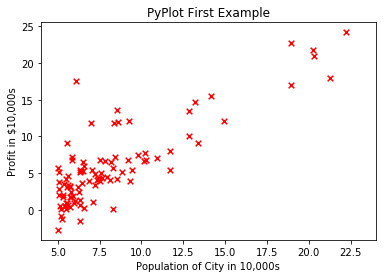

In [18]:
# Definir o gráfico
# style.use('fivethirtyeight') 
fig = plt.figure() 
ax1 = fig.add_subplot(1,1,1)

plt.scatter(data[:,0], data[:,1], s=32, c='red', marker='x')
plt.title("PyPlot First Example")
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.xlim(4, 24)
plt.show()

In [19]:
# Construir amostras e rótulos, a primeira coluna da amostra é 1
xt = np.ones((m,2))
xt[:, 1] =  data[:,0]
labelt = np.zeros((m, 1))
labelt[:, 0] = data[:, 1]

## Construindo o modelo

cost function(square-error loss):
$$J(\theta) = \frac{1}{2m} \sum{i=1}^m \left(h{\theta} (x^{(i)}) - y^{(i)} \right)^2$$ the hypothesis $h{\theta} (x)$ is given by the linear model:
$$h{\theta} (x) = \theta^Tx = \theta_0 + \theta_1 x _1$$

In [20]:
x = T.matrix(name='x', dtype='float64') #  (97 2)
theta_np = np.zeros((2,1),dtype='float64') 
label = T.matrix(name='label', dtype='float64') # (97 1)
alpha = T.scalar(name='alpha', dtype='float64')
theta = theano.shared(theta_np, name='theta') # (2, 1),

In [21]:
y = x.dot(theta) # (97, 1)
predict = theano.function([x], y)
# square-error loss
loss = T.mean((y - label) ** 2) / 2 
calcLoss = theano.function([x, label], loss) 
# Derivação de fórmula manual, scalar
grad_0 = T.mean(y - label) 
#  A forma de (rótulo-y) é (97,1), e a forma de x [:, 1] é (97,) Tudo o que precisa ser alterado usando dimshuffle (97,1)
grad_1 = T.mean((y - label) * (x[:, 1]).dimshuffle(0, 'x')) 
# Execute uma descida em gradiente, usando a pilha para formar uma forma (2)
gradient_step = theano.function([x, label, alpha],updates={theta : theta - alpha * (T.stack([grad_0, grad_1])).dimshuffle(0, 'x')}) 

In [22]:
# Derivação automática
grad = T.grad(loss, theta) 
# Descida de gradiente com derivação automática
gradient_step_auto = theano.function([x, label, alpha],updates={theta : theta - alpha * grad}) 

In [23]:
calcLoss(xt, labelt)

array(32.072733877455676)

## Processo de otimização iterativa de demonstração dinâmica

In [24]:
def animate(i):
    axis = plt.gca()
    axis.clear()
    plt.scatter(data[:,0], data[:,1], s=32, c='red', marker='x')
    plt.title("PyPlot First Example")
    plt.ylabel('Profit in $10,000s')
    plt.xlabel('Population of City in 10,000s')
    plt.xlim(4, 24)
    plt.grid(True) 
    gradient_step_auto(xt, labelt, 0.01) # ou gradient_step(xt, labelt, 0.01) 
    axis.plot(xt[:,1],xt.dot(theta.get_value()))

Using matplotlib backend: MacOSX


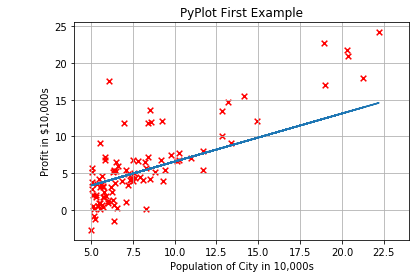

In [25]:
# Animação de exibição não pode usar o modo in-line
%matplotlib auto
fig = plt.figure() 
ax1 = fig.add_subplot(1,1,1)
# Chame o desenho animado a cada ms e treine uma época
ani = animation.FuncAnimation(fig, animate, frames=2000, interval = 1) 

[[-3.89530051]
 [ 1.19298539]]


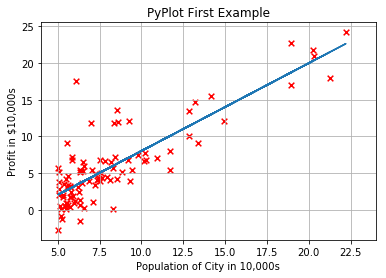

In [28]:
#HTML(ani.to_html5_video())

# train
%matplotlib inline
# Redefinição de parâmetro 0
theta.set_value(theta_np) 
for i in range(5000):
    gradient_step(xt, labelt, 0.01)
# Obter parâmetros
thetaResult = theta.get_value() 

# Desenhe uma linha de regressão
plt.figure()
plt.scatter(data[:,0], data[:,1], s=32, c='red', marker='x')
plt.title("PyPlot First Example")
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.xlim(4, 24)
plt.grid(True) 
plt.plot(xt[:,1],xt.dot(theta.get_value()))
print(thetaResult) 

## Desenhe a planta do piso 3D e o mapa de contorno com a perda mudando com teta

8

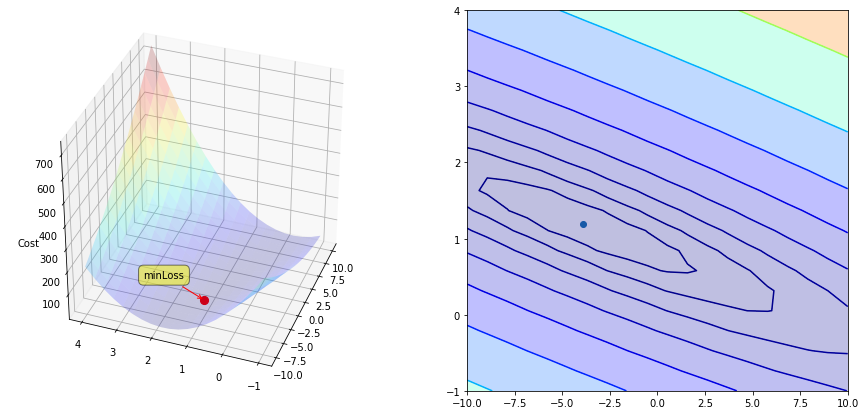

In [30]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

# Definindo imagens tridimensionais
fig3D =  plt.figure(figsize=(15,7))
#ax3D = Axes3D(fig3D) ou ax3D = fig.gca(projection='3d'),Estes dois não sabem como adicionar um subgrafo
ax3D = fig3D.add_subplot(121, projection = '3d')  
axCt = fig3D.add_subplot(122)

thetaA = thetaResult[0, 0]
thetaB = thetaResult[1, 0]

thetaA_vals = np.linspace(-10, 10, 20, endpoint=True)
thetaB_vals = np.linspace(-1, 4, 20, endpoint=True)
J_vals = np.zeros((len(thetaA_vals), len(thetaB_vals)))
X, Y = np.meshgrid(thetaA_vals, thetaB_vals)
"""
# Como o mecanismo de malha de rede precisa atravessar primeiro thetaB_vals
for i, b in enumerate(thetaB_vals): 
    for j, a in enumerate(thetaA_vals):
        theta.set_value(np.array([[a], [b]], dtype='float32'))
        J_vals[i, j] = calcLoss(xt, labelt)
"""
# Recomenda-se Ndenumerate, consistente com o mecanismo meshgrid
for (i, j), _ in np.ndenumerate(J_vals):
        theta.set_value(np.array([[X[i, j]], [Y[i, j]]], dtype='float32'))
        J_vals[i, j] = calcLoss(xt, labelt) 

# Desenhe um mapa de superfície 3D
ax3D.plot_surface(X, Y,  J_vals, rstride=1, cstride=1, alpha=0.2, cmap=plt.cm.jet, shade=False) 
ax3D.set_zlabel('Cost')
ax3D.set_zlim(J_vals.min(), J_vals.max())
ax3D.view_init(elev=35, azim=200)

# Desenhe um mapa de contorno
axCt.scatter(thetaA, thetaB)
axCt.contourf(X, Y,  J_vals, np.logspace(-2, 3, 20), alpha=.25, cmap=plt.cm.jet)
C = axCt.contour(X, Y, J_vals, np.logspace(-2, 3, 20), linewidth=.5, cmap=plt.cm.jet)

# Adicionando anotações dinâmicas à solução ideal em um plano 3D

# Calcula o melhor ponto de theta
theta.set_value(thetaResult) 
# Perda mínima
minLoss = calcLoss(xt, labelt) 

sc = ax3D.scatter(thetaA, thetaB, minLoss, s = 66, c = 'r')

x2, y2, _ = proj3d.proj_transform(thetaA, thetaB, minLoss, ax3D.get_proj()) # Projeção

label = ax3D.annotate(
    "minLoss", 
    # As coordenadas são x2, y2
    xy = (x2, y2), xytext = (-20, 20), 
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0', color='red')) # Definir rótulos

def update_position(e): # Atualizar a dimensão ao mover o mapa 3D
    x2, y2, _ = proj3d.proj_transform(thetaA, thetaB, minLoss, ax3D.get_proj()) # Recalcular a projeção
    label.xy = x2,y2
    label.update_positions(fig3D.canvas.renderer) # Atualizar coordenadas
    fig3D.canvas.draw()
fig3D.canvas.mpl_connect('motion_notify_event', update_position)

## Outra maneira de desenhar gráficos de dispersão 3D

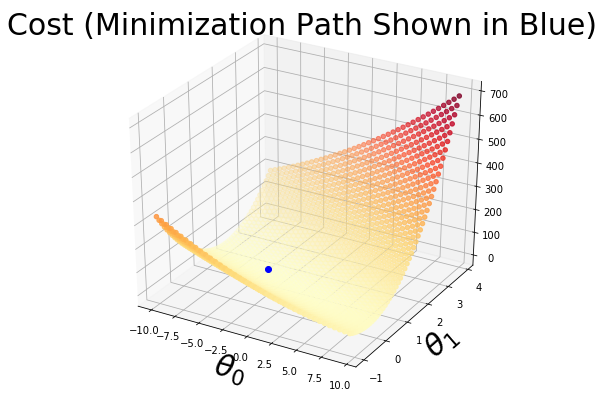

In [32]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

fig = plt.figure(figsize=(8,7))
ax = fig.gca(projection='3d')

xvals = np.arange(-10,10,.5)
yvals = np.arange(-1,4,.1)
myxs, myys, myzs = [], [], []
for david in xvals: # Calcular todos os pontos para desenhar
    for kaleko in yvals:
        myxs.append(david)
        myys.append(kaleko)
        theta.set_value(np.array([[david], [kaleko]], dtype='float32'))
        myzs.append(calcLoss(xt, labelt))

# Desenhe um plano de simulação de treliça
scat = ax.scatter(myxs,myys,myzs,c=np.abs(myzs),cmap=plt.get_cmap('YlOrRd')) 
plt.xlabel(r'$\theta_0$',fontsize=30)
plt.ylabel(r'$\theta_1$',fontsize=30)
plt.title('Cost (Minimization Path Shown in Blue)',fontsize=30)
plt.plot([thetaA], [thetaB], [minLoss],'bo-') # Desenhe o melhor ponto
plt.show()

In [33]:
theta.set_value(theta_np) # Redefinição de parâmetro 0

## Outro método para adicionar rótulos em gráficos 3D

In [34]:
%matplotlib auto

Using matplotlib backend: MacOSX


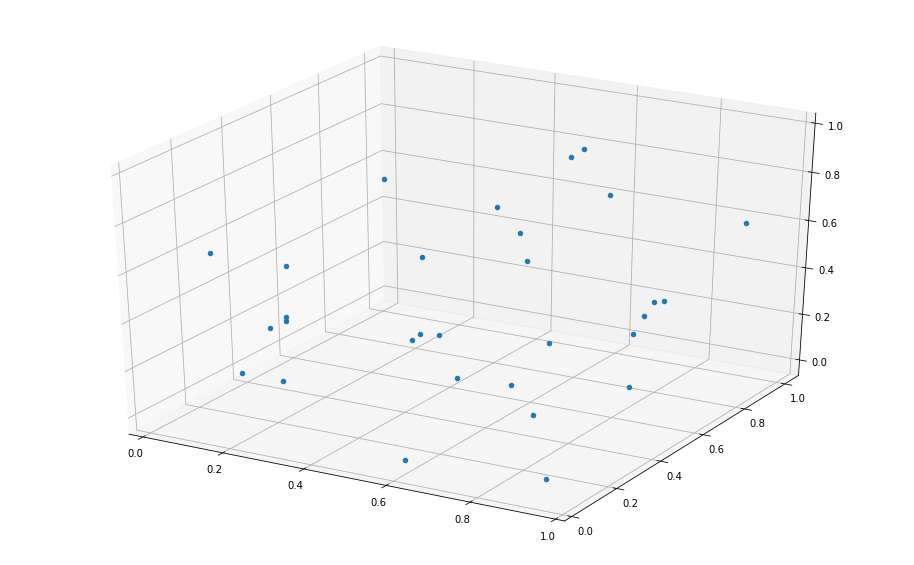

In [35]:
def visualize3DData (X):
    """Visualize data in 3d plot with popover next to mouse position.

    Args:
        X (np.array) - array of points, of shape (numPoints, 3)
    Returns:
        None
    """
    fig = plt.figure(figsize = (16,10))
    ax = fig.add_subplot(111, projection = '3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], depthshade = False, picker = True)


    def distance(point, event):
        """Return distance between mouse position and given data point

        Args:
            point (np.array): np.array of shape (3,), with x,y,z in data coords
            event (MouseEvent): mouse event (which contains mouse position in .x and .xdata)
        Returns:
            distance (np.float64): distance (in screen coords) between mouse pos and data point
        """
        assert point.shape == (3,), "distance: point.shape is wrong: %s, must be (3,)" % point.shape

        # Project 3d data space to 2d data space
        x2, y2, _ = proj3d.proj_transform(point[0], point[1], point[2], plt.gca().get_proj())
        # Convert 2d data space to 2d screen space
        x3, y3 = ax.transData.transform((x2, y2))

        return np.sqrt ((x3 - event.x)**2 + (y3 - event.y)**2)


    def calcClosestDatapoint(X, event):
        """"Calculate which data point is closest to the mouse position.

        Args:
            X (np.array) - array of points, of shape (numPoints, 3)
            event (MouseEvent) - mouse event (containing mouse position)
        Returns:
            smallestIndex (int) - the index (into the array of points X) of the element closest to the mouse position
        """
        distances = [distance (X[i, 0:3], event) for i in range(X.shape[0])]
        return np.argmin(distances)


    def annotatePlot(X, index):
        """Create popover label in 3d chart

        Args:
            X (np.array) - array of points, of shape (numPoints, 3)
            index (int) - index (into points array X) of item which should be printed
        Returns:
            None
        """
        # If we have previously displayed another label, remove it first
        if hasattr(annotatePlot, 'label'):
            annotatePlot.label.remove()
        # Get data point from array of points X, at position index
        x2, y2, _ = proj3d.proj_transform(X[index, 0], X[index, 1], X[index, 2], ax.get_proj())
        annotatePlot.label = plt.annotate( "Value %d" % index,
            xy = (x2, y2), xytext = (-20, 20), textcoords = 'offset points', ha = 'right', va = 'bottom',
            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0', color='red'))
        fig.canvas.draw()


    def onMouseMotion(event):
        """Event that is triggered when mouse is moved. Shows text annotation over data point closest to mouse."""
        closestIndex = calcClosestDatapoint(X, event)
        annotatePlot (X, closestIndex)

    fig.canvas.mpl_connect('motion_notify_event', onMouseMotion)  # on mouse motion
    plt.show()



XX = np.random.random((30,3))
visualize3DData (XX)